In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


###### There is not much correlation between the features

### Outliers

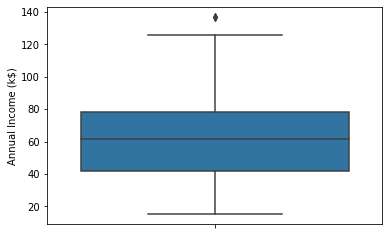

In [7]:
#checking for outliers using boxplot
sns.boxplot(y = "Annual Income (k$)", data = data)

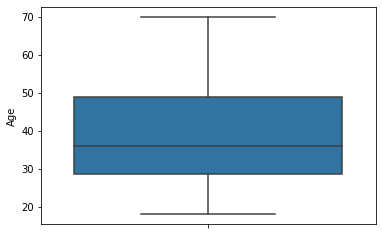

In [8]:
sns.boxplot(y = "Age", data = data)

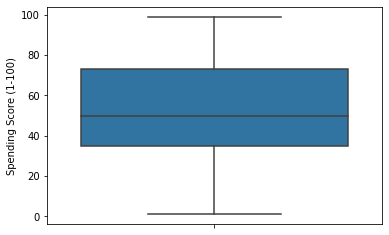

In [9]:
sns.boxplot(y = "Spending Score (1-100)", data = data)

##### Checking for outliers in annual income

In [10]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

In [11]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -13.25
up_limit is 132.75


In [12]:
outlier = []
for x in data['Annual Income (k$)']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
print('Outlier in the dataset is :', outlier)

Outlier in the dataset is : [137, 137]


In [13]:
#replace the outlier with median
data.loc[data['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = 61.5

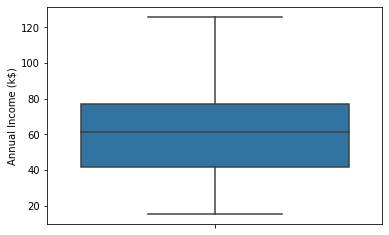

In [14]:
sns.boxplot(y = "Annual Income (k$)", data = data)

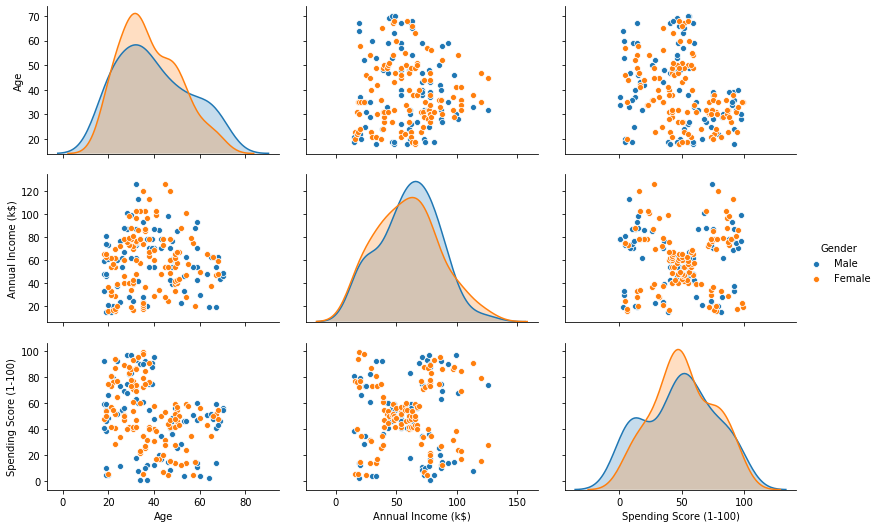

In [15]:
sns.pairplot(data.drop('CustomerID', axis = 1), hue ='Gender', aspect = 1.5)
plt.show()

### Clustering

##### Annual Income and Spending score

In [16]:
from sklearn.cluster import KMeans

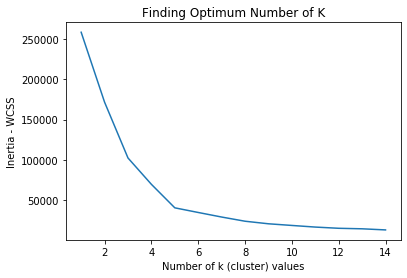

In [17]:
x_data = data[['Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
wcss =[]
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_data)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [18]:
kmean_x_data = KMeans(n_clusters=5, random_state=0)
clusters = kmean_x_data.fit_predict(x_data)
data["Label1"] = clusters

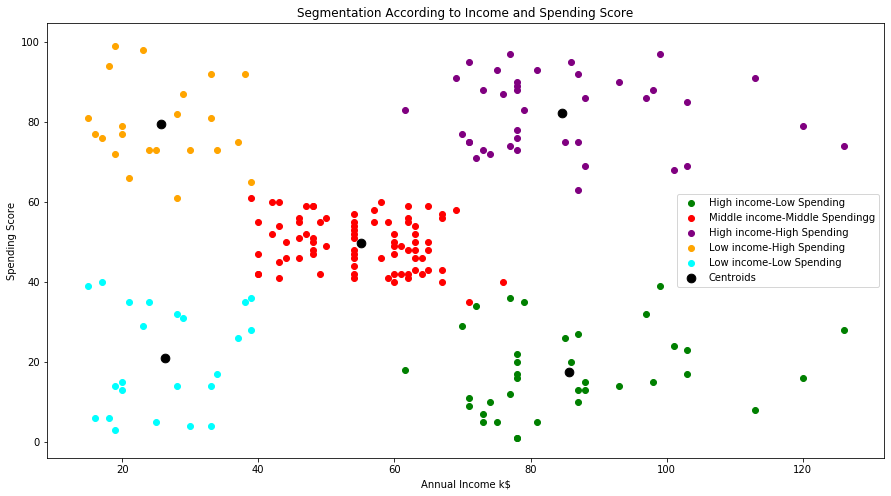

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(x_data[clusters == 0,0 ],x_data[clusters == 0,1 ],color = "green", label = "High income-Low Spending")
plt.scatter(x_data[clusters == 1,0 ],x_data[clusters == 1,1 ],color = "red", label = "Middle income-Middle Spendingg")
plt.scatter(x_data[clusters == 2,0 ],x_data[clusters == 2,1 ],color = "purple", label = "High income-High Spending")
plt.scatter(x_data[clusters == 4,0 ],x_data[clusters == 4,1 ],color = "Orange", label = "Low income-High Spending")
plt.scatter(x_data[clusters == 3,0 ],x_data[clusters == 3,1 ],color = "cyan", label = "Low income-Low Spending")
plt.scatter(kmean_x_data.cluster_centers_[:,0], kmean_x_data.cluster_centers_[:,1], color="black", label="Centroids",s =75)#0,1 x and y axis
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

In [20]:
import pickle

pickle.dump(kmean_x_data, open ("model.pkl","wb"))